In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)
df=pd.read_csv(path+"/IMDB Dataset.csv")

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [5]:
df.head(10)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performa...",positive
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a ...,positive
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the ...",negative
8,"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting...",negative
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",positive


In [6]:

df.shape

(50000, 2)

In [7]:
df = df.iloc[:10000]
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [8]:
df.shape

(10000, 2)

In [9]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5028
negative,4972


In [10]:
df.isnull().sum()

,0
review,0
sentiment,0


In [11]:
df.duplicated().sum()

np.int64(17)

In [12]:
#remove duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Basic Preprocessing


*   Remove tags - HTML
*   Lower case
*   remove stopwords



In [13]:
#remove html tag
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text


In [14]:
df['review']=df['review'].apply(remove_tags)
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [15]:
#lower case
df['review']=df['review'].apply(lambda x:x.lower())
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [16]:
#remove stopword
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['review']=df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['review'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

# Level Encoder

In [17]:
#level encoder sentiment
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha...",1
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit...",1
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r...",1
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable...",0
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ...",1


In [18]:
X = df.iloc[:,0:1]
y = df['sentiment']
X.head()

,review
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha..."
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit..."
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r..."
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable..."
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ..."


In [19]:
y.head()

,sentiment
0,1
1,1
2,1
3,0
4,1


In [20]:
#task
# 1. train_test_split
# 2.Applying BoW
# 3.train naive_baye model
# 4.RandomForestClassifier

In [21]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
#apply bag og word
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()


In [36]:
#train naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)


GaussianNB()

In [40]:
#score calculate
y_pred = gnb.predict(X_test_bow)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))


0.6339509263895844


In [41]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8477716574862293

# N-grams

In [46]:
#aplly bi-grams
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [47]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
X_train_bow.shape

(7986, 5000)

In [27]:
#apply randomclassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)
#predict
y_pred = rf.predict(X_test_bow)

In [30]:
print(accuracy_score(y_test, y_pred))

0.8492739108662994


# TF-IDF

In [49]:
#apply tfidf

tf = TfidfTransformer()
X_train_tf = tf.fit_transform(X_train_bow)
X_test_tf = tf.transform(X_test_bow)

#random classifier
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)
#predict
y_pred = rf.predict(X_test_tf)

In [50]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [39]:
confusion_matrix(y_test,y_pred)

array([[859, 122],
       [173, 843]])

In [51]:
print(accuracy_score(y_test, y_pred))

0.85628442663996


<Axes: >

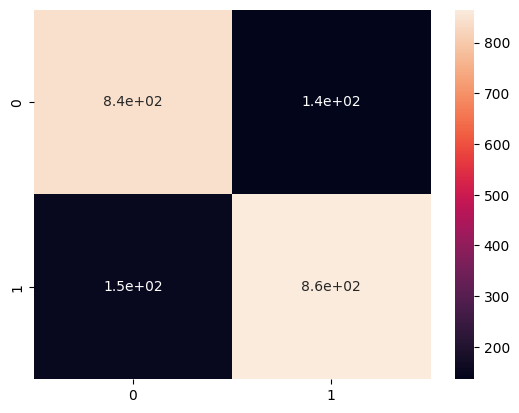

In [55]:
#print confusion matrix using plt
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)